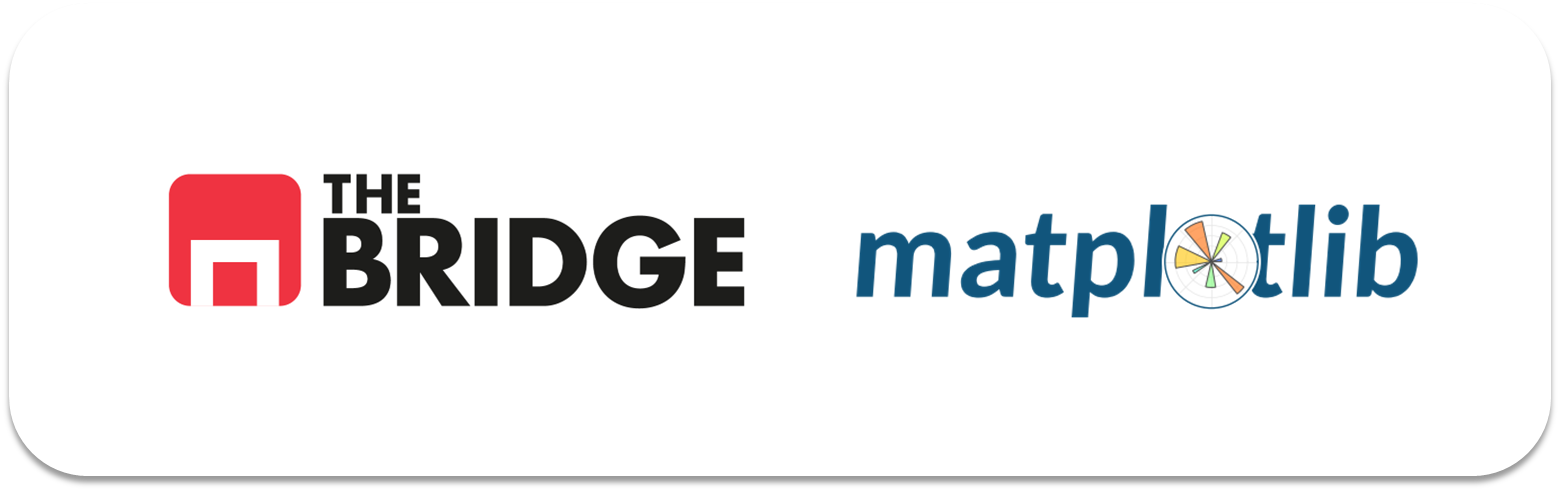

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [2]:
df = pd.read_csv("./data/california_cities.csv", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 482 entries, 0 to 481
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                482 non-null    object 
 1   latd                482 non-null    float64
 2   longd               482 non-null    float64
 3   elevation_m         434 non-null    float64
 4   elevation_ft        470 non-null    float64
 5   population_total    482 non-null    int64  
 6   area_total_sq_mi    480 non-null    float64
 7   area_land_sq_mi     482 non-null    float64
 8   area_water_sq_mi    481 non-null    float64
 9   area_total_km2      477 non-null    float64
 10  area_land_km2       478 non-null    float64
 11  area_water_km2      478 non-null    float64
 12  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 52.7+ KB


In [3]:
df_limpio = df.dropna(subset=['latd', 'longd'])
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 482 entries, 0 to 481
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                482 non-null    object 
 1   latd                482 non-null    float64
 2   longd               482 non-null    float64
 3   elevation_m         434 non-null    float64
 4   elevation_ft        470 non-null    float64
 5   population_total    482 non-null    int64  
 6   area_total_sq_mi    480 non-null    float64
 7   area_land_sq_mi     482 non-null    float64
 8   area_water_sq_mi    481 non-null    float64
 9   area_total_km2      477 non-null    float64
 10  area_land_km2       478 non-null    float64
 11  area_water_km2      478 non-null    float64
 12  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 52.7+ KB


In [4]:
df['elevation_ft'] = df.apply(lambda row: row['elevation_m'] * 3.28084 if pd.isnull(row['elevation_ft']) and not pd.isnull(row['elevation_m']) else row['elevation_ft'], axis = 1)
df['elevation_m'] = df.apply(lambda row: row['elevation_ft']/ 3.28084 if pd.isnull(row['elevation_m']) and not pd.isnull(row['elevation_ft']) else row['elevation_m'], axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 482 entries, 0 to 481
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                482 non-null    object 
 1   latd                482 non-null    float64
 2   longd               482 non-null    float64
 3   elevation_m         474 non-null    float64
 4   elevation_ft        474 non-null    float64
 5   population_total    482 non-null    int64  
 6   area_total_sq_mi    480 non-null    float64
 7   area_land_sq_mi     482 non-null    float64
 8   area_water_sq_mi    481 non-null    float64
 9   area_total_km2      477 non-null    float64
 10  area_land_km2       478 non-null    float64
 11  area_water_km2      478 non-null    float64
 12  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 52.7+ KB


In [6]:
df.dropna(subset=['elevation_m'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 474 entries, 0 to 481
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                474 non-null    object 
 1   latd                474 non-null    float64
 2   longd               474 non-null    float64
 3   elevation_m         474 non-null    float64
 4   elevation_ft        474 non-null    float64
 5   population_total    474 non-null    int64  
 6   area_total_sq_mi    472 non-null    float64
 7   area_land_sq_mi     474 non-null    float64
 8   area_water_sq_mi    473 non-null    float64
 9   area_total_km2      470 non-null    float64
 10  area_land_km2       471 non-null    float64
 11  area_water_km2      471 non-null    float64
 12  area_water_percent  471 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 51.8+ KB


In [7]:
df['area_total_sq_mi'] = df.apply(lambda row: row['area_total_km2'] * 2.58999 if pd.isnull(row['area_total_sq_mi']) and not pd.isnull(row['area_total_km2']) else row['area_total_sq_mi'], axis = 1)
df['area_total_km2'] = df.apply(lambda row: row['area_total_sq_mi'] / 2.58999 if pd.isnull(row['area_total_km2']) and not pd.isnull(row['area_total_sq_mi']) else row['area_total_km2'], axis = 1)

In [8]:
df['area_land_sq_mi'] = df.apply(lambda row: row['area_land_km2'] * 2.58999 if pd.isnull(row['area_land_sq_mi']) and not pd.isnull(row['area_land_km2']) else row['area_land_sq_mi'], axis = 1)
df['area_land_km2'] = df.apply(lambda row: row['area_land_sq_mi'] / 2.58999 if pd.isnull(row['area_land_km2']) and not pd.isnull(row['area_land_sq_mi']) else row['area_total_km2'], axis = 1)
df['area_water_sq_mi'] = df.apply(lambda row: row['area_water_km2'] * 2.58999 if pd.isnull(row['area_water_sq_mi']) and not pd.isnull(row['area_water_km2']) else row['area_water_sq_mi'], axis = 1)
df['area_water_km2'] = df.apply(lambda row: row['area_water_sq_mi'] / 2.58999 if pd.isnull(row['area_water_km2']) and not pd.isnull(row['area_water_sq_mi']) else row['area_water_km2'], axis = 1)



In [9]:
df.dropna(inplace=True)
df.info()
#podría seguir limpiendo los nulos con cálculos pero entiendo que no era el objetivo del ejercicio

<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 0 to 481
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                470 non-null    object 
 1   latd                470 non-null    float64
 2   longd               470 non-null    float64
 3   elevation_m         470 non-null    float64
 4   elevation_ft        470 non-null    float64
 5   population_total    470 non-null    int64  
 6   area_total_sq_mi    470 non-null    float64
 7   area_land_sq_mi     470 non-null    float64
 8   area_water_sq_mi    470 non-null    float64
 9   area_total_km2      470 non-null    float64
 10  area_land_km2       470 non-null    float64
 11  area_water_km2      470 non-null    float64
 12  area_water_percent  470 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 51.4+ KB


In [10]:
df_top5 = df.sort_values(by= 'population_total', ascending=False).head(5)
df_top5

,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
239,LosAngeles,34.050000,-118.250000,71.000000,2.00000,3884307,503.000,469.000,34.000,1302.000000,1302.000000,88.000000,6.70
367,SanDiego,32.715000,-117.162500,6.000000,3.00000,1345895,372.400,325.190,47.210,964.510000,964.510000,122.270000,12.68
375,SanJose,37.333333,-121.900000,26.000000,85.30184,1000536,179.970,176.526,3.439,466.109000,466.109000,8.908000,1.91
370,SanFrancisco,37.783333,-122.416667,15.849599,52.00000,837442,231.890,46.870,185.020,89.533164,18.096595,71.436569,80.00
150,Fresno,36.750000,-119.766667,93.878397,308.00000,509039,112.308,111.957,0.351,290.877000,290.877000,0.910000,0.31


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

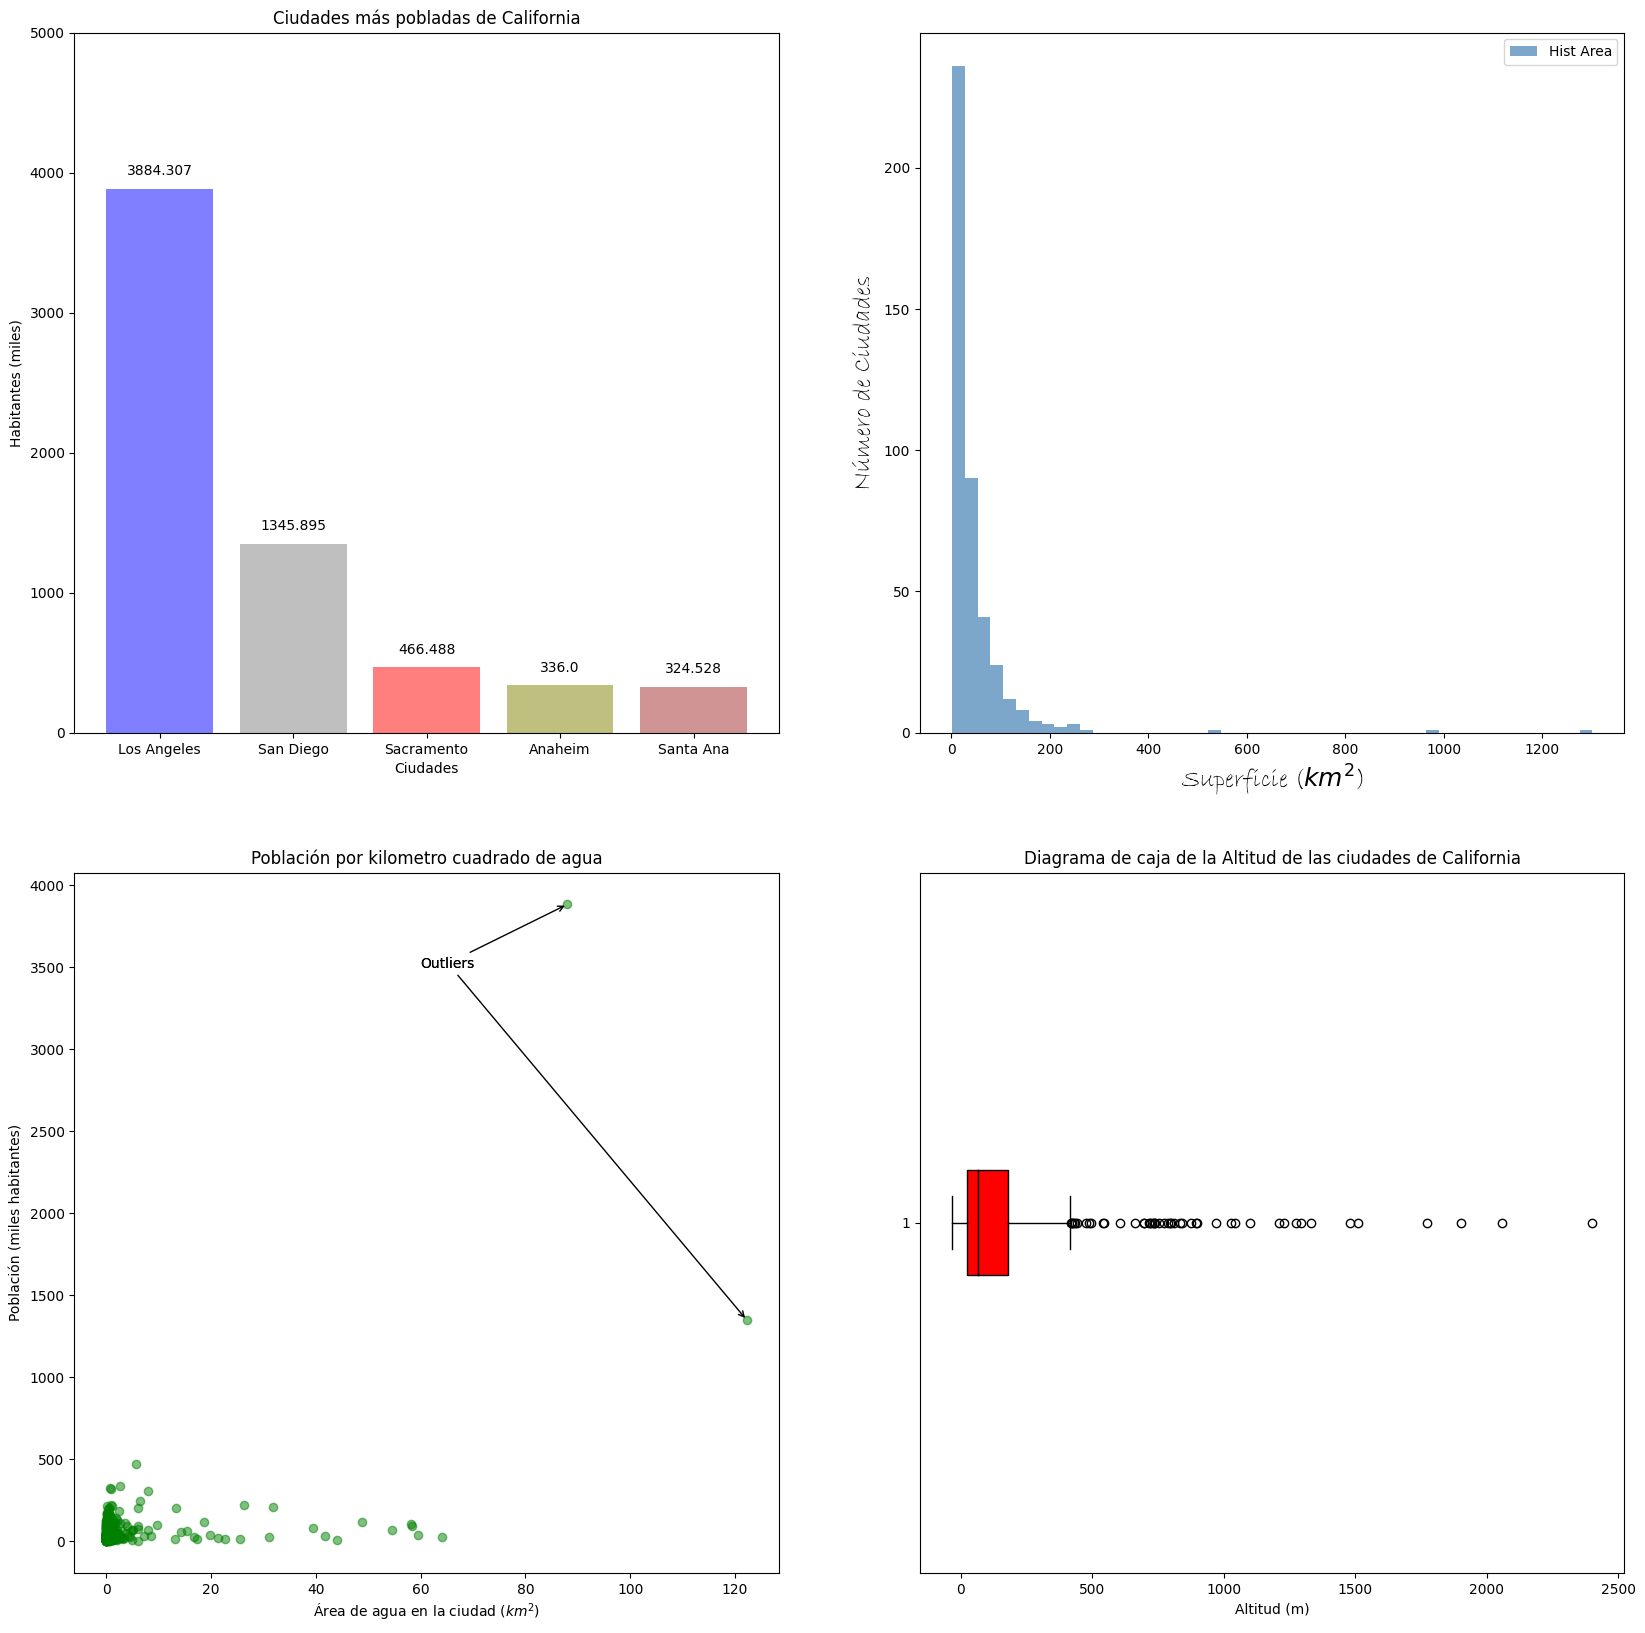

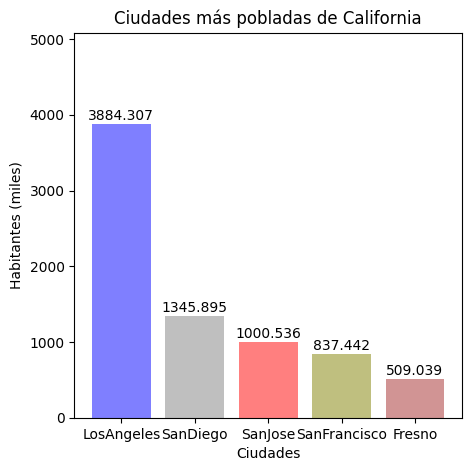

In [11]:
# Gráfico 1 - Ciudades más pobladas


colores = ["blue", "gray", "red", "olive", "brown"]
plt.figure(figsize=(5,5))
bars = plt.bar(df_top5["city"], df_top5["population_total"], color = colores, alpha = 0.5)
plt.ylabel("Habitantes (miles)")
plt.xlabel("Ciudades")
plt.title("Ciudades más pobladas de California")
plt.ylim(0, df_top5["population_total"].max() + 1200000)
for bar, total in zip(bars, df_top5['population_total']):
    height = bar.get_height()
    plt.annotate(f'{total/1000}',
                 xy= (bar.get_x() + bar.get_width()/2, height),
                 xytext= (0, 3),
                 textcoords= "offset points",
                 ha= 'center')
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(1000000))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}'))
 
plt.savefig('plot1.png')



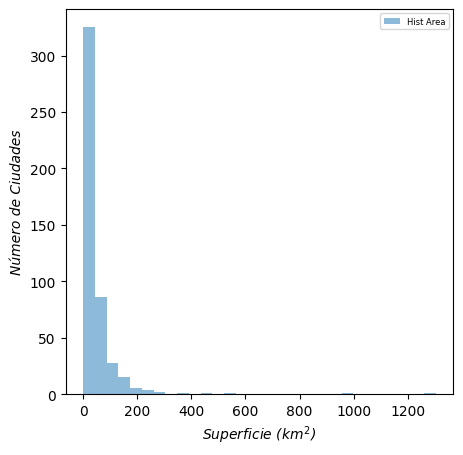

In [12]:
# Gráfico 2 - Área de ciudades
plt.figure(figsize=(5,5))
plt.hist(df['area_total_km2'], bins = 30, alpha = 0.5, label='Hist Area')
plt.xlabel('Superficie ($km^2$)', style = 'italic')
plt.ylabel('Número de Ciudades', style = 'italic')
plt.legend(loc='upper right', fontsize = 6)

plt.savefig('plot2.png')

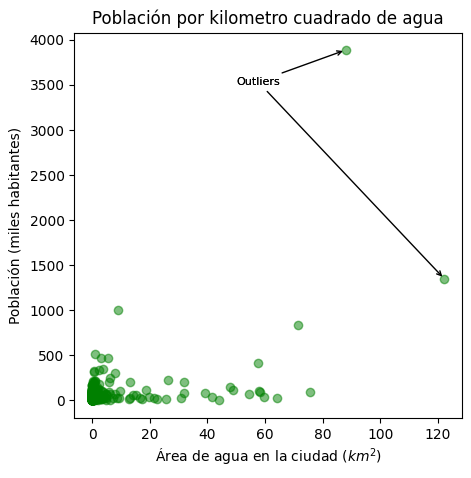

In [13]:
# Gráfico 3 - Área de agua con su población
plt.figure(figsize=(5,5))
plt.scatter(df['area_water_km2'], df['population_total'], alpha = 0.5, color = 'green')
plt.xlabel('Área de agua en la ciudad ($km^2$)', style = 'normal')
plt.ylabel('Población (miles habitantes)')
plt.title('Población por kilometro cuadrado de agua')

outliers = df[df['area_water_km2'] > 80]
for index, row in outliers.iterrows():
    plt.annotate('Outliers',
                 xy=(row['area_water_km2'], row['population_total']),
                 xytext=(50, 3500000),
                 arrowprops={'arrowstyle': '->'},
                 fontsize=8)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}'))

plt.savefig('plot3.png')

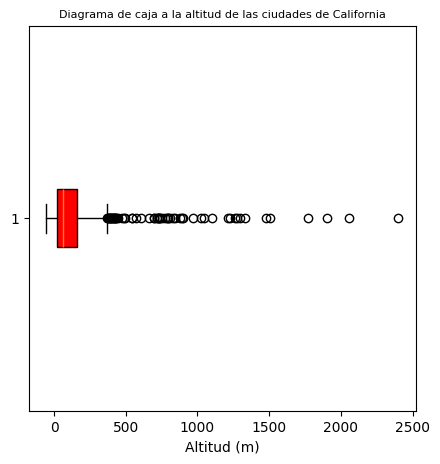

In [14]:
# Gráfico 4 - Diagrama de caja
plt.figure(figsize=(5,5))
plt.boxplot(df['elevation_m'], vert= False, patch_artist = True, boxprops=dict(facecolor = 'red'))
plt.title('Diagrama de caja a la altitud de las ciudades de California', size = 8)
plt.xlabel('Altitud (m)')
plt.savefig('plot4.png')

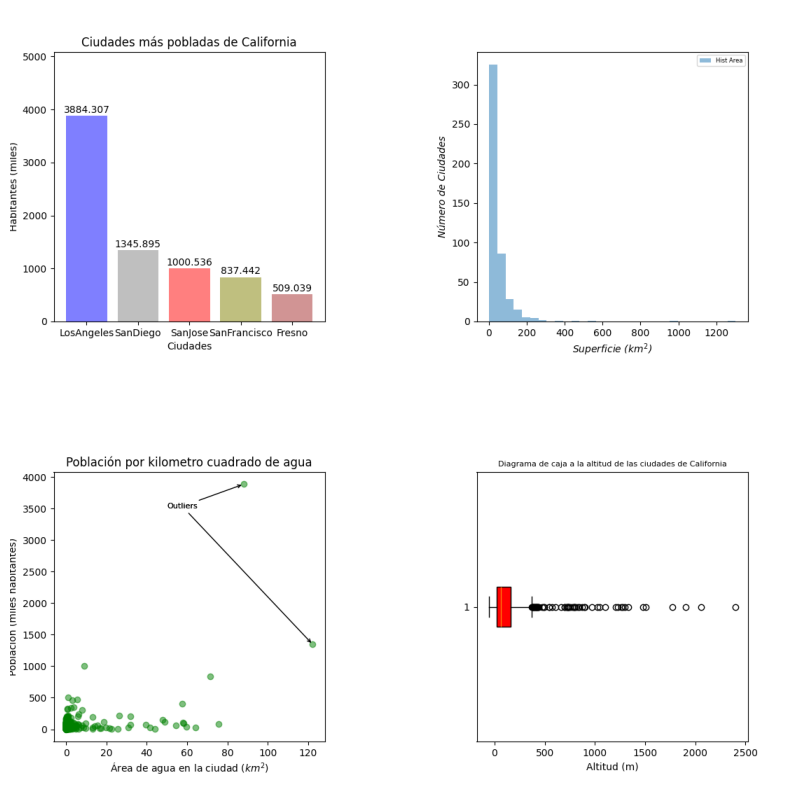

In [15]:
from PIL import Image

img1 = Image.open('plot1.png')
img2 = Image.open('plot2.png')
img3 = Image.open('plot3.png')
img4 = Image.open('plot4.png')

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(img1)
axs[0, 0].axis('off')

axs[0, 1].imshow(img2)
axs[0, 1].axis('off')

axs[1, 0].imshow(img3)
axs[1, 0].axis('off')

axs[1, 1].imshow(img4)
axs[1, 1].axis('off')


# Guardardado de la figura combinada
plt.savefig('figuras_combinadas.png')


### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

In [16]:
#Hecho en el punto anterior
#plt.savefig('figuras_combinadas.png')